In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv("insurance_part2_data.csv")

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [11]:
df.drop(['Agency_Code','Type','Channel'], axis = 1,inplace=True)

In [12]:
df.isnull().sum()

Age             0
Claimed         0
Commision       0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [13]:
print(df.nunique())

Age              70
Claimed           2
Commision       324
Duration        257
Sales           380
Product Name      5
Destination       3
dtype: int64


In [14]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Claimed,Commision,Duration,Sales,Product Name,Destination
63,30,1,15.0,27,60.0,0,0
329,36,0,0.0,5,20.0,2,0
407,36,0,0.0,11,19.0,1,0
411,35,0,0.0,2,20.0,2,0
422,36,0,0.0,5,20.0,2,0
...,...,...,...,...,...,...,...
2940,36,0,0.0,8,10.0,1,0
2947,36,0,0.0,10,28.0,2,0
2952,36,0,0.0,2,10.0,1,0
2962,36,0,0.0,4,20.0,2,0


In [15]:
def univariateAnalysis_numeric(column,nbins):
   
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    


In [16]:
df_num = df.select_dtypes(include = ['float64', 'int64',])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Distribution of Age
----------------------------------------------------------------------------


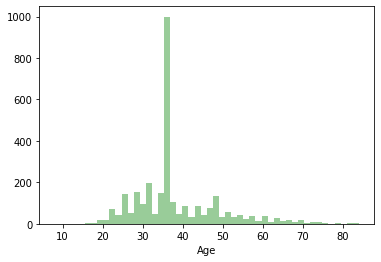

Distribution of Commision
----------------------------------------------------------------------------


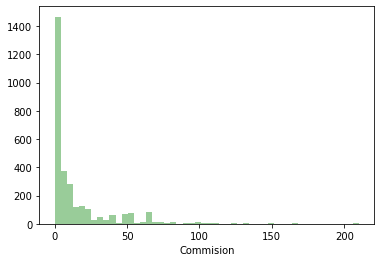

Distribution of Duration
----------------------------------------------------------------------------


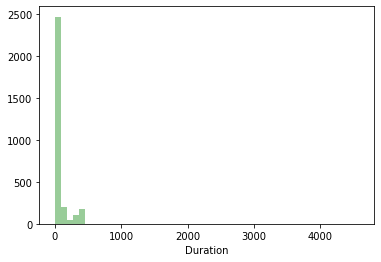

Distribution of Sales
----------------------------------------------------------------------------


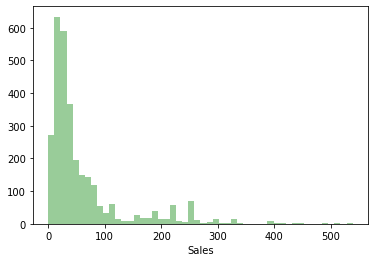

In [17]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

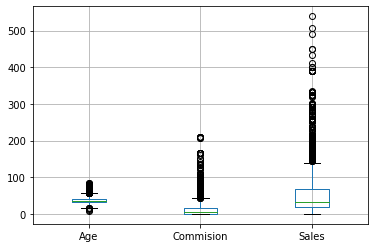

In [18]:
df.boxplot(column=['Age', 'Commision',  'Sales'])

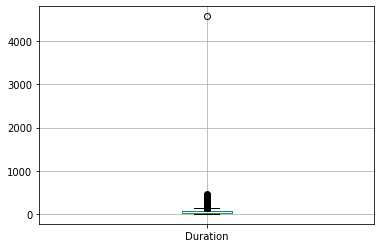

In [19]:
df.boxplot(column=['Duration'])

In [20]:
indexNames = df[ df['Duration'] > 500 ].index

In [21]:
df.drop(indexNames , inplace=True)

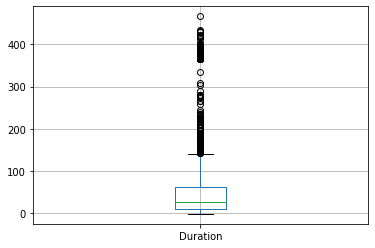

In [22]:
df.boxplot(column=['Duration'])

In [23]:
corr = df.corr(method='pearson')

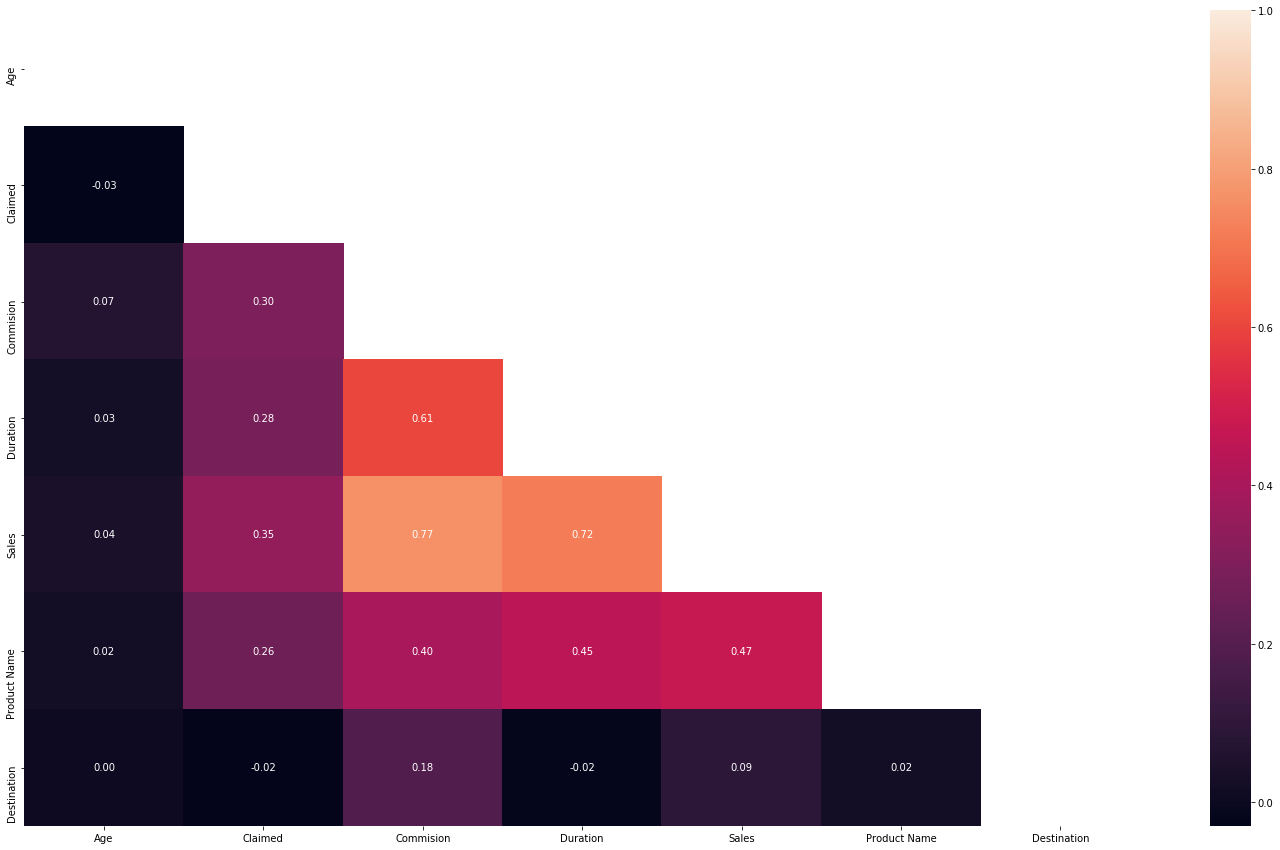

In [24]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [25]:
# capture the target column ("default") into separate vectors for training set and test set

X = df.drop("Claimed" , axis=1)

y = df.pop("Claimed")

In [26]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=0)

## Decision Tree Classifier

In [27]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini',)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
from sklearn import tree

train_char_label = ['No', 'Yes']
HR_Tree_File = open('d:\hr_tree.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=HR_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

HR_Tree_File.close()

In [29]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.187748
Commision     0.096743
Duration      0.264984
Sales         0.201023
Product Name  0.220250
Destination   0.029252


In [30]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 1.000


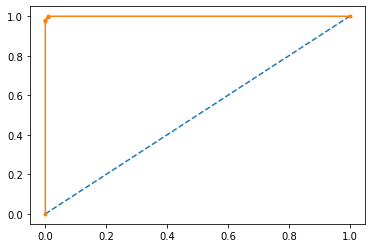

In [31]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.674


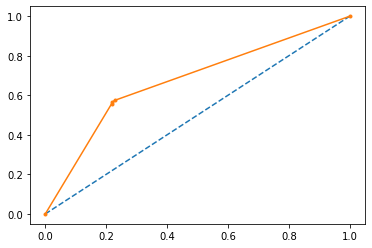

In [32]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [33]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1663
           1       1.00      0.98      0.99       736

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



In [34]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       412
           1       0.54      0.56      0.55       188

    accuracy                           0.71       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.72      0.71      0.71       600



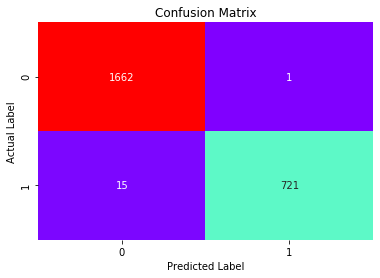

In [35]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

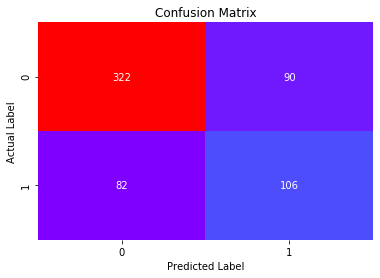

In [36]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
reg_dt_model.score(X_train,train_labels)

0.9933305543976657

In [38]:
reg_dt_model.score(X_test,test_labels)

0.7133333333333334

## Running Grid search:

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,40,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450]
}

dt_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [40]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'],
                         'max_depth': [10, 20, 30, 40, 50],
                  

In [41]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 150}

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini'],
    'max_depth': [2,5,8,10],
    'min_samples_leaf': [40,50,60],
    'min_samples_split': [100,175,200]
}

dt_model = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [43]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 5, 8, 10],
                         'min_samples_leaf': [40, 

In [44]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100}

In [45]:
grid_search.score(X_test,test_labels)

0.7783333333333333

In [46]:
best_grid = grid_search.best_estimator_

In [47]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [48]:
from sklearn.metrics import classification_report

AUC: 0.840


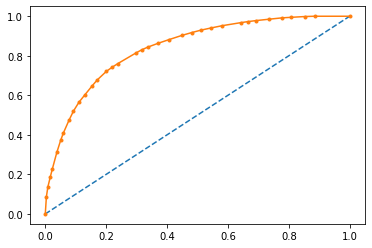

In [49]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.818


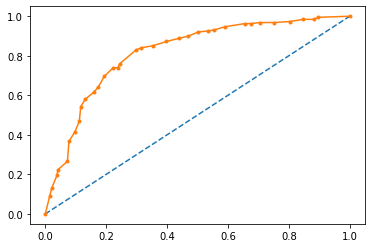

In [50]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [51]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1663
           1       0.69      0.57      0.62       736

    accuracy                           0.79      2399
   macro avg       0.76      0.73      0.74      2399
weighted avg       0.78      0.79      0.78      2399



In [52]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       412
           1       0.67      0.58      0.62       188

    accuracy                           0.78       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600



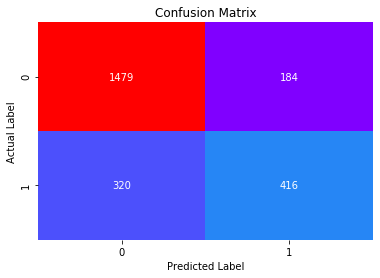

In [53]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

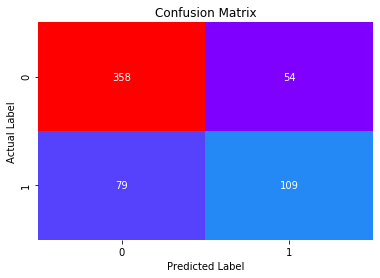

In [54]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print (f'Train Accuracy - : {grid_search.score(X_train,train_labels):.3f}')
print (f'Test Accuracy - : {grid_search.score(X_test,test_labels):.3f}')

Train Accuracy - : 0.790
Test Accuracy - : 0.778


In [56]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.017786
Commision     0.116291
Duration      0.031426
Sales         0.161731
Product Name  0.669285
Destination   0.003482


In [57]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Random Forest Classifier

In [58]:
rfcl = RandomForestClassifier(n_estimators = 501, oob_score= True,random_state=0)
rfcl.fit(X_train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [60]:
rfcl.score(X_train,train_labels)

0.9933305543976657

In [61]:
rfcl.oob_score_

0.7473947478115882

In [62]:
rfcl.predict_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)>

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.177715
Commision     0.170742
Duration      0.276217
Sales         0.230244
Product Name  0.117542
Destination   0.027540


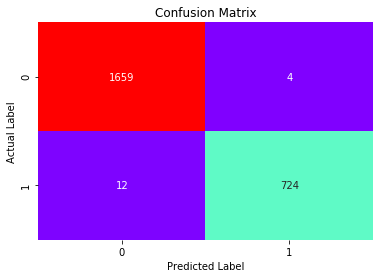

In [65]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1663
           1       0.99      0.98      0.99       736

    accuracy                           0.99      2399
   macro avg       0.99      0.99      0.99      2399
weighted avg       0.99      0.99      0.99      2399



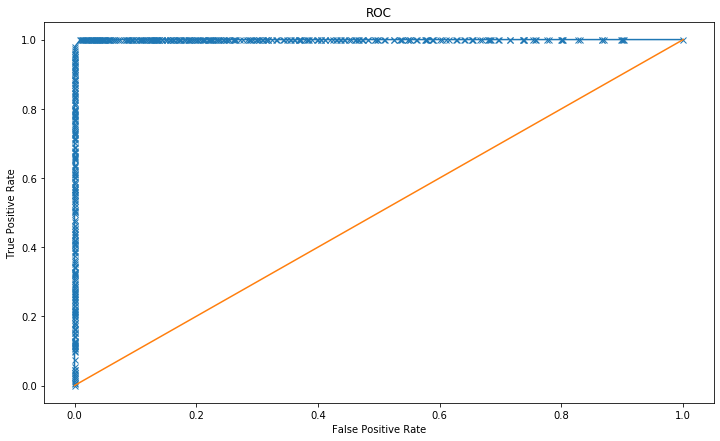

Area under Curve is 0.999803099427436


In [67]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

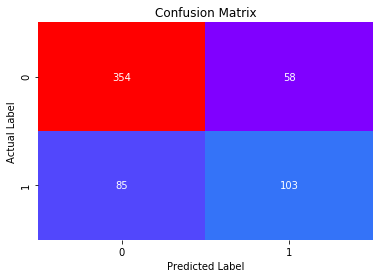

In [68]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [69]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.64      0.55      0.59       188

    accuracy                           0.76       600
   macro avg       0.72      0.70      0.71       600
weighted avg       0.75      0.76      0.76       600



In [70]:
rfcl.score(X_test,test_labels)

0.7616666666666667

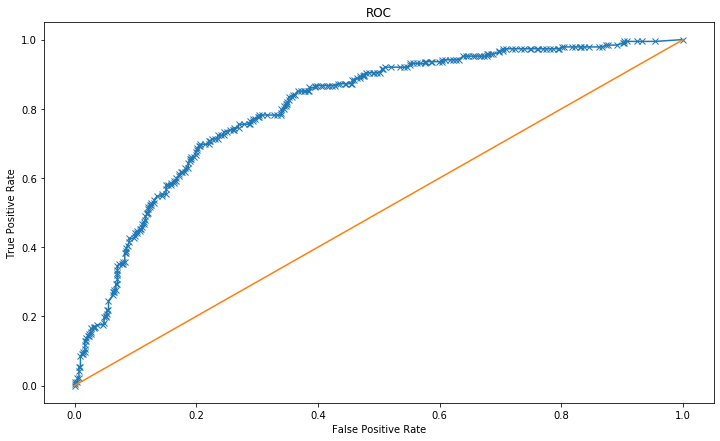

Area under Curve is 0.8047278454864698


In [71]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

## Running Grid search:

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6,8]
# Minimum number of samples required to split a node
min_samples_split = [5,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 8], 'min_samples_split': [5, 8], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [75]:
rf_Model = RandomForestClassifier(random_state=0, oob_score= True)

In [76]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)


In [77]:
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   24.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   34.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=0,
                                    

In [78]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 72}

In [79]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.838
Test Accuracy - : 0.758


In [80]:
best_grid=rf_Grid

In [81]:
best_grid = grid_search.best_estimator_

In [82]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

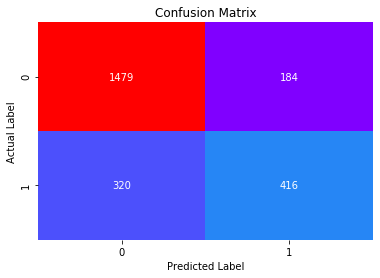

In [83]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1663
           1       0.69      0.57      0.62       736

    accuracy                           0.79      2399
   macro avg       0.76      0.73      0.74      2399
weighted avg       0.78      0.79      0.78      2399



In [85]:
best_grid.score(X_test,test_labels)

0.7783333333333333

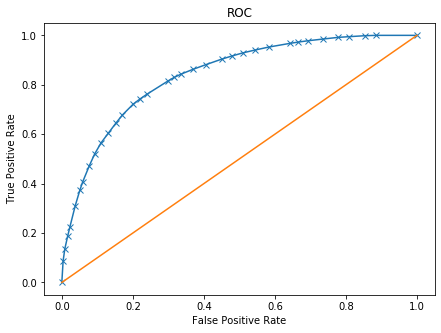

Area under Curve is 0.8401747431305393


In [86]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

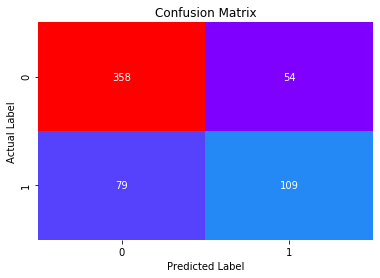

In [87]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [88]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       412
           1       0.67      0.58      0.62       188

    accuracy                           0.78       600
   macro avg       0.74      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600



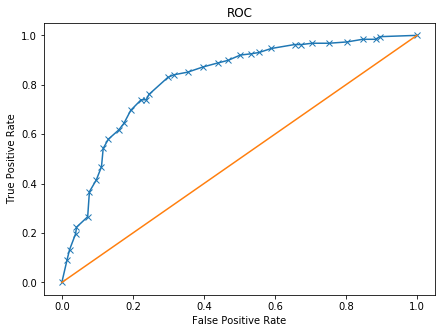

Area under Curve is 0.8176964986573022


In [89]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))

In [91]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.017786
Commision     0.116291
Duration      0.031426
Sales         0.161731
Product Name  0.669285
Destination   0.003482


## MLP Classifier (Artificial Neural Network)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=0)

In [94]:
sc = StandardScaler()

In [95]:
x_train = sc.fit_transform(x_train)

In [96]:
x_train

array([[-0.19502181, -0.5620477 , -0.43121947, -0.50920294,  0.27604939,
        -0.4423209 ],
       [-0.48406052,  1.84872386,  2.82709413,  2.70109815,  1.8756689 ,
        -0.4423209 ],
       [-0.19502181, -0.5620477 , -0.51696457, -0.28475541,  0.27604939,
        -0.4423209 ],
       ...,
       [-0.48406052, -0.26837674, -0.6122369 , -0.53725888, -1.32357013,
        -0.4423209 ],
       [-0.19502181, -0.5620477 , -0.38358331, -0.84587423, -0.52376037,
        -0.4423209 ],
       [-1.35117665, -0.5620477 , -0.54554627, -0.46711903,  0.27604939,
        -0.4423209 ]])

In [97]:
x_test = sc.transform(x_test)

In [98]:
x_test

array([[-0.19502181, -0.5620477 , -0.27878375, -0.481147  , -0.52376037,
        -0.4423209 ],
       [-0.9657917 ,  0.51080476, -0.32641991,  0.73227247,  1.8756689 ,
        -0.4423209 ],
       [-0.9657917 , -0.5620477 ,  0.20710512, -0.34086729, -0.52376037,
        -0.4423209 ],
       ...,
       [ 2.984404  , -0.5620477 , -0.48838287, -0.56531482,  0.27604939,
        -0.4423209 ],
       [-0.19502181, -0.5620477 , -0.20256589,  0.23427951,  0.27604939,
         3.03109263],
       [-0.38771428, -0.21498202, -0.06918463, -0.481147  , -1.32357013,
        -0.4423209 ]])

In [99]:
clf = MLPClassifier(verbose=True,  random_state=0)

In [100]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.63670887
Iteration 2, loss = 0.59143433
Iteration 3, loss = 0.56582330
Iteration 4, loss = 0.55442106
Iteration 5, loss = 0.54676242
Iteration 6, loss = 0.54128400
Iteration 7, loss = 0.53619920
Iteration 8, loss = 0.53192335
Iteration 9, loss = 0.52824174
Iteration 10, loss = 0.52483205
Iteration 11, loss = 0.52185565
Iteration 12, loss = 0.51929502
Iteration 13, loss = 0.51632218
Iteration 14, loss = 0.51416225
Iteration 15, loss = 0.51216665
Iteration 16, loss = 0.51026911
Iteration 17, loss = 0.50871239
Iteration 18, loss = 0.50746582
Iteration 19, loss = 0.50598926
Iteration 20, loss = 0.50473236
Iteration 21, loss = 0.50353287
Iteration 22, loss = 0.50266999
Iteration 23, loss = 0.50147215
Iteration 24, loss = 0.50062705
Iteration 25, loss = 0.49952711
Iteration 26, loss = 0.49887759
Iteration 27, loss = 0.49808180
Iteration 28, loss = 0.49760460
Iteration 29, loss = 0.49671779
Iteration 30, loss = 0.49615385
Iteration 31, loss = 0.49573304
Iteration 32, los

C:\Users\josep\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


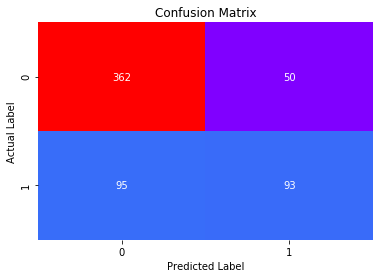

In [101]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

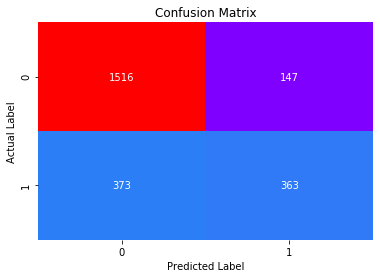

In [102]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)
sns.heatmap(confusion_matrix(y_train,pred2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       412
           1       0.65      0.49      0.56       188

    accuracy                           0.76       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.75      0.76      0.75       600



In [104]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1663
           1       0.71      0.49      0.58       736

    accuracy                           0.78      2399
   macro avg       0.76      0.70      0.72      2399
weighted avg       0.77      0.78      0.77      2399



AUC: 0.822


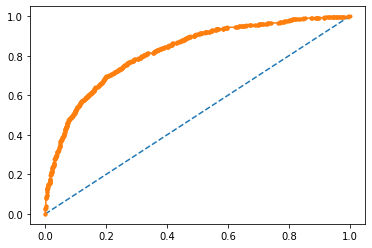

In [105]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.804


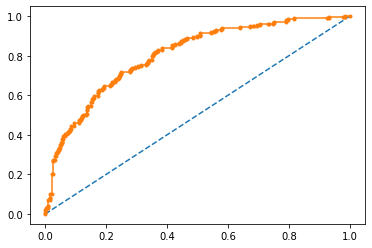

In [106]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [107]:
param_grid = {
    'hidden_layer_sizes': [[100],[100,100],[100,100,100]],
    'activation': ['logistic','relu'],
    'solver': ['sgd'],
    'tol': [0.01,0.0001],
    'max_iter' : [2000,5000],
    'learning_rate':['adaptive']
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [108]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes

In [109]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': [100],
 'learning_rate': 'adaptive',
 'max_iter': 5000,
 'solver': 'sgd',
 'tol': 0.0001}

In [110]:
param_grid = {
    'hidden_layer_sizes': [[100,100],200,300],
    'activation': ['relu'],
    'solver': ['sgd'],
    'tol': [0.0001],
    'max_iter' : [2500,3000],
    
    'learning_rate':['adaptive']
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [111]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['

In [112]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': [100, 100],
 'learning_rate': 'adaptive',
 'max_iter': 2500,
 'solver': 'sgd',
 'tol': 0.0001}

In [113]:
best_grid = grid_search.best_estimator_


In [114]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [115]:
print (f'Train Accuracy - : {best_grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {best_grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.782
Test Accuracy - : 0.790


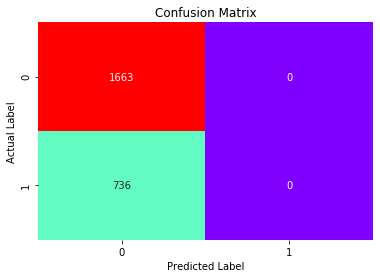

In [116]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

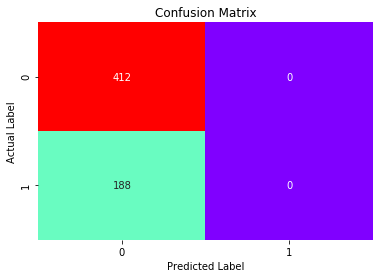

In [117]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [118]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1663
           1       0.00      0.00      0.00       736

    accuracy                           0.69      2399
   macro avg       0.35      0.50      0.41      2399
weighted avg       0.48      0.69      0.57      2399



C:\Users\josep\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       412
           1       0.00      0.00      0.00       188

    accuracy                           0.69       600
   macro avg       0.34      0.50      0.41       600
weighted avg       0.47      0.69      0.56       600



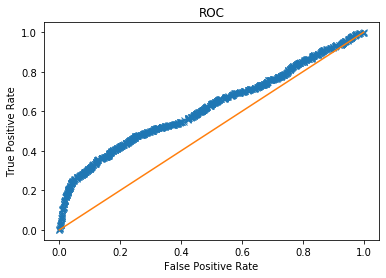

Area under Curve is 0.6222638173547022


In [120]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

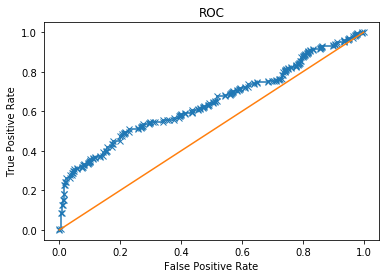

Area under Curve is 0.6459280107415823


In [121]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

In [122]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns))

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'